# NFL - Which quarters correlate most with winning?
### Does winning in the first quarter really matter in the NFL?

![theatlantic](https://cdn.theatlantic.com/assets/media/video/img/upload/2012/01/screen-shot-2012-01-31-at-14643-pm/video-featured.png?1431550038 "Bill Maher — Irritable Bowl Syndrome; Directed and Animated by Fraser Davidson")

##### Set the tone. Get ahead early. Win each quarter.
One would assume that [Al Pacino in Any Given Sunday](https://www.youtube.com/watch?v=f1yWSePMqsk) methodology in football is correct that the game of football is one inch by inch. But does certain inches matter? In this case we are referring to quarters in the NFL game. If a team wins each quarter obviously they win the game right? Makes sense, however, does winning in the first quarter (or even the first half) correlated to a win by the end of the game? By playing the hardest right out of the gates, would that lead to your team overdoing it early in the game so that there is limited energy in the final _inches_?

Can teams really afford to wait that long to give it their all? Or does winning early actually set the tone for winning the entire game? Luckily there is data readily available to feed our eager minds! In formal data science terms we would formalize these question simply as is there a correlation between the first quarter point differential and winning percentage?

### Overview
In this post we will walk through solving a complete machine learning problem using the NFL dataset. Our notebook objective is as follows:

Use the provided NFL data to develop a model to assess the correlation between team winning in the first 2 quarters and winning games over the course of the season.
To get started, first lets review the basic approach for developing this solutions. This is a supervised regression machine learning task. Which means we have been given a set of data with target (in this case score differences for each quarter) included and we want to train a model that can learn to map the features to the target.

We will be using the NFL data from [nflscrapR-data](https://github.com/ryurko/nflscrapR-data). We mainly use the [nfl_season_pbp_dataset](https://github.com/ryurko/nflscrapR-data/tree/master/data/season_play_by_play) (pbp = play by play). Note only regular season data is used in our evaluation, however, we did include playoff data to indicate which team went to the playoffs.

One law of data science to keep top of mind here when assessing this (quite limited scope) data science project is that correlation does not imply causation. This is a common statistics phases used to emphasize that a correlation between two variables does not imply that one causes the other.

With that said, lets get started! 

## Data Imports and Data Analysis

In [1]:
import pandas as pd  # data manipultion librabry
import numpy as np # numerical cmputation library

# Display up to 120 columns of a dataframe
pd.set_option('display.max_columns', 120)

import matplotlib.pyplot as plt  # plotting library
%matplotlib inline

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
# sns.set(font_scale = 2)

import season play by play data

In [2]:
pbp = pd.read_csv('nfl_season_pbp.csv')
pbp[pbp.posteam=='DAL'].tail()

/home/redne/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (26,52) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Date,GameID,play_id,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,yrdln,yrdline100,ydstogo,ydsnet,GoalToGo,FirstDown,posteam,DefensiveTeam,desc,PlayAttempted,Yards.Gained,sp,Touchdown,ExPointResult,TwoPointConv,DefTwoPoint,Safety,Onsidekick,PuntResult,PlayType,Passer,Passer_ID,PassAttempt,PassOutcome,PassLength,AirYards,YardsAfterCatch,QBHit,PassLocation,InterceptionThrown,Interceptor,Rusher,Rusher_ID,RushAttempt,RunLocation,RunGap,Receiver,Receiver_ID,Reception,ReturnResult,Returner,BlockingPlayer,Tackler1,Tackler2,FieldGoalResult,FieldGoalDistance,Fumble,RecFumbTeam,RecFumbPlayer,Sack,Challenge.Replay,ChalReplayResult,Accepted.Penalty,PenalizedTeam,PenaltyType,PenalizedPlayer,Penalty.Yards,PosTeamScore,DefTeamScore,ScoreDiff,AbsScoreDiff,HomeTeam,AwayTeam,Timeout_Indicator,Timeout_Team,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,No_Score_Prob,Opp_Field_Goal_Prob,Opp_Safety_Prob,Opp_Touchdown_Prob,Field_Goal_Prob,Safety_Prob,Touchdown_Prob,ExPoint_Prob,TwoPoint_Prob,ExpPts,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
407683,2012-12-30,2012123007,3637,22,4,NaN,01:09,2,69.0,0.0,WAS,35.0,35.0,0,0,0.0,NaN,DAL,WAS,K.Forbath kicks 59 yards from WAS 35 to DAL 6....,1,20,0,0,NaN,NaN,NaN,0,0,NaN,Kickoff,NaN,None,0,NaN,NaN,0,0,0,NaN,0,NaN,NaN,None,0,NaN,NaN,NaN,None,0,NaN,D.Harris,NaN,C.Wilson,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,18.0,28.0,-10.0,10.0,WAS,DAL,0,None,0,0,0,0,0,0.702720,0.048047,0.003351,0.034880,0.111059,0.000459,0.099483,0.0,0.0,0.635472,0.192438,NaN,NaN,0.984384,0.015616,0.985743,0.014257,0.015616,-0.001359,NaN,NaN,2012
407684,2012-12-30,2012123007,3659,22,4,1.0,01:02,2,62.0,7.0,DAL,26.0,74.0,10,4,0.0,0.0,DAL,WAS,(1:02) (Shotgun) T.Romo pass short middle to F...,1,4,0,0,NaN,NaN,NaN,0,0,NaN,Pass,T.Romo,00-0021678,1,Complete,Short,1,3,0,middle,0,NaN,NaN,None,0,NaN,NaN,F.Jones,00-0026162,1,NaN,NaN,NaN,J.Wilson,S.Bowen,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,18.0,28.0,-10.0,10.0,WAS,DAL,0,None,0,0,0,0,0,0.676691,0.044547,0.002162,0.032302,0.128912,0.000490,0.114896,0.0,0.0,0.827910,-0.054144,-0.172892,0.118748,0.985743,0.014257,0.988452,0.011548,0.014257,-0.002710,-0.002032,-0.000678,2012
407685,2012-12-30,2012123007,3687,22,4,2.0,00:40,1,40.0,22.0,DAL,30.0,70.0,6,9,0.0,0.0,DAL,WAS,"(:40) (No Huddle, Shotgun) T.Romo pass short r...",1,5,0,0,NaN,NaN,NaN,0,0,NaN,Pass,T.Romo,00-0021678,1,Complete,Short,2,3,0,right,0,NaN,NaN,None,0,NaN,NaN,J.Hanna,00-0029634,1,NaN,NaN,NaN,J.Wilson,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,18.0,28.0,-10.0,10.0,WAS,DAL,0,None,0,0,0,0,0,0.689524,0.044315,0.001826,0.031873,0.122792,0.000518,0.109152,0.0,0.0,0.773766,0.176164,-0.124669,0.300833,0.988452,0.011548,0.932941,0.067059,0.011548,0.055511,0.002206,0.053305,2012
407686,2012-12-30,2012123007,3711,22,4,3.0,00:15,1,15.0,25.0,DAL,35.0,65.0,1,16,0.0,0.0,DAL,WAS,"(:15) (No Huddle, Shotgun) T.Romo pass short m...",1,7,0,0,NaN,NaN,NaN,0,0,NaN,Pass,T.Romo,00-0021678,1,Complete,Short,5,2,0,middle,0,NaN,NaN,None,0,NaN,NaN,J.Hanna,00-0029634,1,NaN,NaN,NaN,P.Riley,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,18.0,28.0,-10.0,10.0,WAS,DAL,0,None,0,0,0,0,0,0.686712,0.040447,0.001428,0.028126,0.107493,0.000404,0.135389,0.0,0.0,0.949931,0.000000,0.270577,-0.270577,0.932941,0.067059,1.000000,0.000000,0.067059,-0.067059,-0.065616,-0.001442,2012
407687,2012-12-30,2012123007,3735,22,4,NaN,00:00,0,0.0,15.0,DAL,35.0,35.0,0,16,0.0,0.0,DAL,WAS,END GAME,1,0,0,0,NaN,NaN,NaN,0,0,NaN,End of Game,NaN,None,0,NaN,NaN,0,0,0,NaN,0,NaN,NaN,None,0,NaN,NaN,NaN,None,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,NaN,NaN,-10.0,NaN,WAS,DAL,0,None,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,NaN,NaN,1.000000,0.000000,1.000000,0.000000,0.000004,0.000000,NaN,NaN,2012


### Coorelate for all games by quarter

In [3]:
pbp_qt = pbp.groupby(by=['qtr']).AbsScoreDiff.mean()
pbp_qt

qtr
1     2.965845
2     7.198825
3     9.757652
4    10.954968
5     0.835036
Name: AbsScoreDiff, dtype: float64

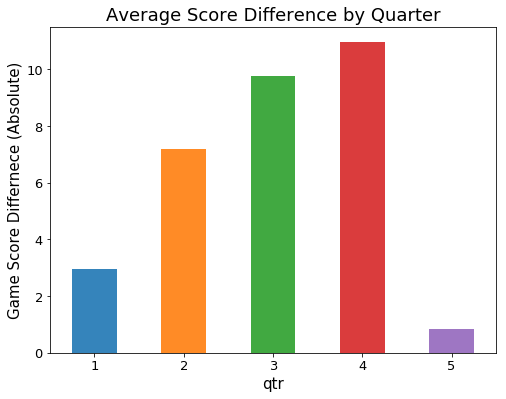

In [4]:
# graph it
fig, ax = plt.subplots(figsize=(8,6), dpi = 72)

ax.set_title("Average Score Difference by Quarter", fontsize = 18)
ax.set_xlabel('Quarters', fontsize = 15)
ax.set_ylabel('Game Score Differnece (Absolute)', fontsize=15)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

pbp_qt.plot(kind='bar', alpha = 0.9, rot=0)
plt.show()

Here we can see there is a significant distribution between the score difference from the first quarter to the fourth quarter. However, and interesting insight would be to see the distribution of wins and losses.

Next we add game win indicators. In the dataset there are columns that show the score for each play, however, because this is individual play by play data, there is no overall Wins / Losses column. So therefore, we will simply take a subset of the data by season, GameID column indicated the unique games and for each home and away team we will create a new dataframe (df) to indicate which team won or loss their game overall and then merge that new column so we can track at the quarter level.

In [5]:
def lastplay(df):
    if np.isnan(df.iloc[-1].Home_WP_pre) == False:
        return df.iloc[-1] # last row of data frame
    elif np.isnan(df.iloc[-2].Home_WP_pre) == False:
        return df.iloc[-2] # last row of data frame

# pbp[(pbp.Season == 2017)].groupby('GameID').apply(lastplay)

In [6]:
wl_df = pbp.groupby('GameID').apply(lastplay).groupby(by=['Season','GameID','HomeTeam','AwayTeam']).agg({'Home_WP_pre':lambda x: int(round(x)),
                                                                    'Away_WP_pre':lambda x: int(round(x))}).reset_index()


wl_df = wl_df[['GameID','HomeTeam','AwayTeam','Home_WP_pre', 'Away_WP_pre']].rename(columns={'Home_WP_pre':'home_win',
                                                                       'Away_WP_pre':'away_win'})


wl_df.head()

/home/redne/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'GameID' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


,GameID,HomeTeam,AwayTeam,home_win,away_win
0,2.009091e+09,PIT,TEN,1.0,0.0
1,2.009091e+09,ATL,MIA,1.0,0.0
2,2.009091e+09,BAL,KC,1.0,0.0
3,2.009091e+09,CAR,PHI,0.0,1.0
4,2.009091e+09,CIN,DEN,0.0,1.0


In [7]:
pbp = pbp.merge(wl_df, on=['GameID','HomeTeam','AwayTeam'], how='left')

use lambda logic to set a Win or Loss for each team on offesne (posteam)

In [8]:
pbp['team_win'] = pbp.apply(lambda x: x.home_win if x.HomeTeam == x.posteam else x.away_win, axis=1)


create a column for a total turnovers

In [9]:
tunrover_list = ['InterceptionThrown', 'Fumble']
pbp['Turnover'] = pbp[tunrover_list].sum(axis=1)
pbp[pbp.GameID==2017123108].groupby('posteam')['Turnover'].sum()

posteam
DAL    1
PHI    3
Name: Turnover, dtype: int64

Now that we have the wins and losses, we select a hand full of columns (soon to be referred to as features) that have the most impact on assess the correlation between early score differentiation and winning the game / season. To do this we will utilize the groupby function.

In [10]:
pbp_df = pbp.groupby(by=['Season','GameID','qtr',
           'HomeTeam',
           'AwayTeam','posteam']).agg({'team_win':'mean',
                                       'ScoreDiff':'mean',
                                       'AbsScoreDiff':'mean',
                                       'Win_Prob':'mean',
                                       'Yards.Gained':'sum',
                                       'Penalty.Yards':'sum',
                                       'Touchdown':'sum',
                                       'Turnover':'sum',
                                       'FirstDown':'count',
                                       'FirstDown':'sum'                
    }).reset_index()

In [11]:
pbp_df[pbp_df.GameID==2017123108 ].tail(10)

,Season,GameID,qtr,HomeTeam,AwayTeam,posteam,team_win,ScoreDiff,AbsScoreDiff,Win_Prob,Yards.Gained,Penalty.Yards,Touchdown,Turnover,FirstDown
18623,2017,2017123108,1,PHI,DAL,DAL,1.0,0.00,0.00,0.536279,31,0,0,0,4.0
18624,2017,2017123108,1,PHI,DAL,PHI,0.0,0.00,0.00,0.508311,89,19,0,2,7.0
18625,2017,2017123108,2,PHI,DAL,DAL,1.0,0.00,0.00,0.507605,152,30,0,1,9.0
18626,2017,2017123108,2,PHI,DAL,PHI,0.0,0.00,0.00,0.509095,69,10,0,0,4.0
18627,2017,2017123108,3,PHI,DAL,DAL,1.0,0.00,0.00,0.492023,100,9,0,0,5.0
18628,2017,2017123108,3,PHI,DAL,PHI,0.0,0.00,0.00,0.496479,29,25,0,0,5.0
18629,2017,2017123108,4,PHI,DAL,DAL,1.0,4.08,4.08,0.785912,118,5,1,0,8.0
18630,2017,2017123108,4,PHI,DAL,PHI,0.0,-6.00,6.00,0.233718,93,15,0,1,7.0


Add Features for Thrid and Fouth down

In [12]:
test = pbp[(pbp.down == 4.0) & (pbp.PlayType != 'Punt') & (pbp.PlayType != 'No Play')& (pbp.PlayType != 'Field Goal')].groupby(['GameID','qtr','posteam']).agg({'down':'count',
                                                                          'FirstDown':'sum',
                                                                          'Touchdown':'sum'}).reset_index()

test['fourth_down_conv_rate']= (test['FirstDown']+test['Touchdown'])/test['down']*100

test = test.drop(['down','FirstDown','Touchdown'], axis=1)
pbp_df = pbp_df.merge(test, on=['GameID','qtr','posteam'], how='left')

In [13]:
test = pbp[(pbp.down == 3.0) & (pbp.PlayType != 'Punt') & (pbp.PlayType != 'No Play')& (pbp.PlayType != 'Field Goal')].groupby(['GameID','qtr','posteam']).agg({'down':'count',
                                                                          'FirstDown':'sum',
                                                                          'Touchdown':'sum'}).reset_index()

test['third_down_conv_rate']= (test['FirstDown']+test['Touchdown'])/test['down']*100

test = test.drop(['down','FirstDown','Touchdown'], axis=1)
pbp_df = pbp_df.merge(test, on=['GameID','qtr','posteam'], how='left')

Use lambda logic to have a win loss str variable for each team

In [14]:
pbp_df['team_win_str'] = pbp_df.apply(lambda x: 'Win' if x.team_win == 1.0 else 'Loss', axis=1)

To understand the correlation between score in quarters, we need to take the score differences by quarter and make each of these features. To do this we will utilize pandas.pivot_table function to enable us to transpose our score difference values.

In [15]:
df2 = pd.pivot_table(pbp_df, index = ['GameID','posteam'], columns = ['qtr'], values = 'ScoreDiff').reset_index()
df2 = df2.rename(columns= {1:'ScoreDiff1', 2:'ScoreDiff2', 3:'ScoreDiff3', 4:'ScoreDiff4', 5:'ScoreDiff5'})
df2[df2.posteam == 'DAL'].head()

qtr,GameID,posteam,ScoreDiff1,ScoreDiff2,ScoreDiff3,ScoreDiff4,ScoreDiff5
18,2009091308,DAL,1.235294,-0.727273,11.533333,11.933333,NaN
60,2009092014,DAL,-0.850000,-2.615385,-0.312500,-3.500000,NaN
95,2009092800,DAL,0.000000,-1.750000,-2.272727,6.450000,NaN
116,2009100410,DAL,1.178571,5.333333,3.000000,-1.466667,NaN
132,2009101104,DAL,0.000000,-9.045455,-8.437500,-1.200000,0.0


In [16]:
pbp_df = pbp_df.merge(df2, on=['GameID','posteam'], how='left')
pbp_df.head()

,Season,GameID,qtr,HomeTeam,AwayTeam,posteam,team_win,ScoreDiff,AbsScoreDiff,Win_Prob,Yards.Gained,Penalty.Yards,Touchdown,Turnover,FirstDown,fourth_down_conv_rate,third_down_conv_rate,team_win_str,ScoreDiff1,ScoreDiff2,ScoreDiff3,ScoreDiff4,ScoreDiff5
0,2009,2009091000,1,PIT,TEN,PIT,1.0,0.00000,0.00000,0.524745,40,0,0,1,5.0,NaN,25.000000,Win,0.0,0.24000,0.0,-2.25,0.0
1,2009,2009091000,1,PIT,TEN,TEN,0.0,0.00000,0.00000,0.532470,128,20,0,1,8.0,NaN,33.333333,Loss,0.0,-1.26087,0.0,0.00,NaN
2,2009,2009091000,2,PIT,TEN,PIT,1.0,0.24000,0.24000,0.525211,172,25,1,1,4.0,NaN,33.333333,Win,0.0,0.24000,0.0,-2.25,0.0
3,2009,2009091000,2,PIT,TEN,TEN,0.0,-1.26087,1.26087,0.514109,134,15,1,0,6.0,NaN,50.000000,Loss,0.0,-1.26087,0.0,0.00,NaN
4,2009,2009091000,3,PIT,TEN,PIT,1.0,0.00000,0.00000,0.539772,28,0,0,1,3.0,NaN,25.000000,Win,0.0,0.24000,0.0,-2.25,0.0


Filter to only include teams that one the first quarter

In [17]:
pbp_df = pbp_df[pbp_df.ScoreDiff1 > 0]

### Exploration Data Analysis

Next we will plot the winning and losising segments of our data. 

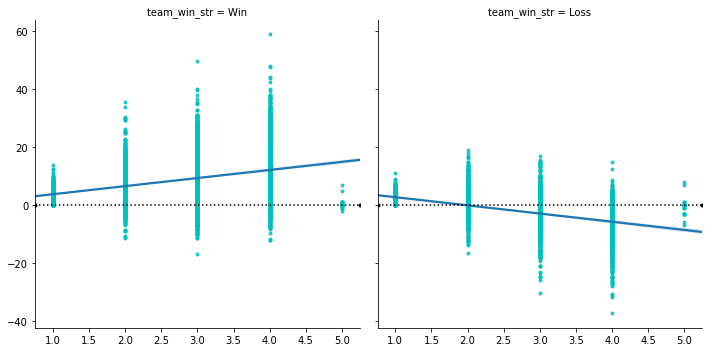

In [28]:
g = sns.lmplot('qtr', 'ScoreDiff', col='team_win_str', data=pbp_df,
               markers=".", scatter_kws=dict(color='c'))
g.map(plt.axhline, y=0.1, color="k", ls=":");

Porbability of winning per quarter

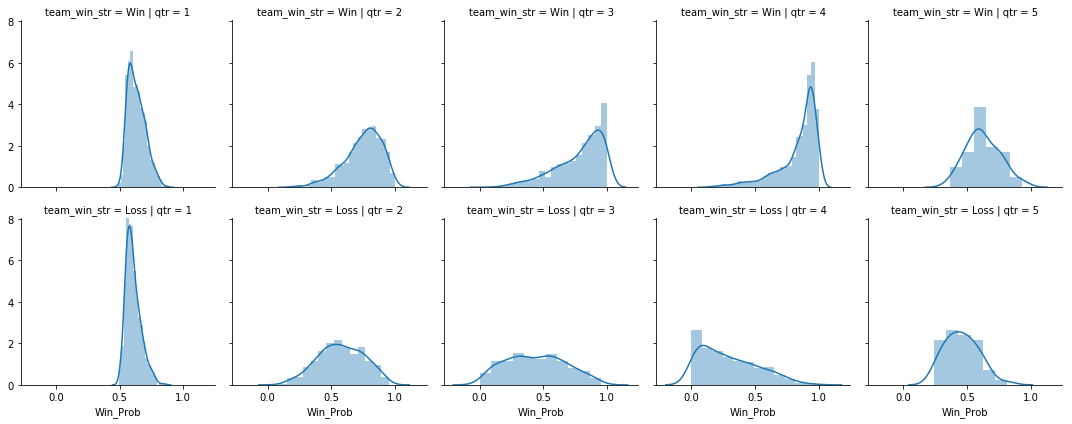

In [29]:
plt.figure(figsize=(20,20))
g = sns.FacetGrid(pbp_df, row='team_win_str', col='qtr')
g.map(sns.distplot, "Win_Prob")
plt.show()

Here we utilized a bar plot to show the distributino of the score per quarter using the mean using the win / loss category

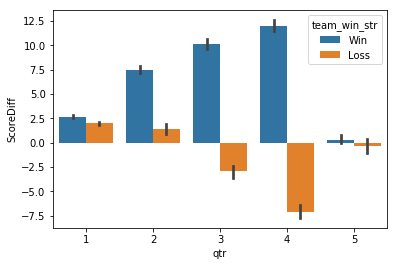

In [30]:
sns.barplot(x="qtr", y="ScoreDiff", hue="team_win_str", data=pbp_df);

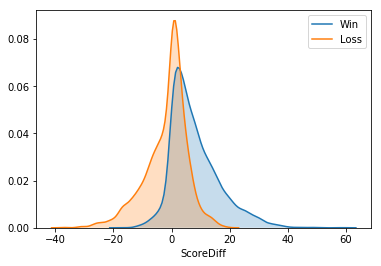

In [31]:
sns.kdeplot(pbp_df.ScoreDiff[pbp_df.team_win_str=='Win'], label='Win', shade=True)
sns.kdeplot(pbp_df.ScoreDiff[pbp_df.team_win_str=='Loss'], label='Loss', shade=True)
plt.xlabel('ScoreDiff');

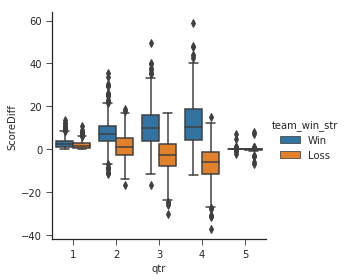

In [32]:
plt.figure(figsize=(50,10))
with sns.axes_style(style='ticks'):
    g = sns.factorplot("qtr", "ScoreDiff", "team_win_str", data=pbp_df, kind="box")
    g.set_axis_labels("qtr", "ScoreDiff");

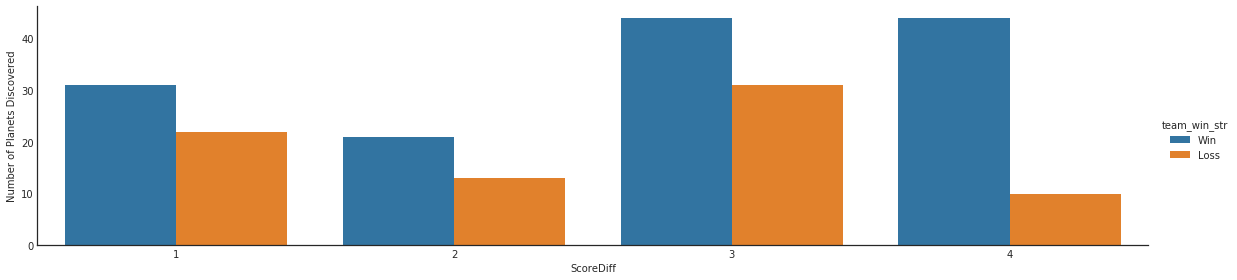

In [33]:
with sns.axes_style('white'):
    g = sns.factorplot("ScoreDiff", data=pbp_df, aspect=4.0, kind='count',
                       hue='team_win_str', order=range(1,5))
    g.set_ylabels('Number of Planets Discovered')

## Feature Engineering & Selection
This is one of the most important parts of machine learning. Feature selection implies some degree of cardinality reduction, to impose a cutoff on the number of attributes that can be considered when building a model. In addition to the features included in the new data frame created above, we utilize additional features to describe the offensive productivity as well as the overall progress of the game.

Below we add features to indicate third and fourth down conversion rate. These down efficiency measure how often the team is able to convert a third or fourth down into a first down or a score. It is calculated by dividing the total number of 3rd/4th downs converted to first downs or scoring plays, and dividing it by the total number of 3rd/4th downs.

,ScoreDiff,ScoreDiff1,ScoreDiff2,ScoreDiff3,ScoreDiff4,ScoreDiff5,Touchdown,Turnover,Penalty.Yards,Win_Prob,AbsScoreDiff,team_win,third_down_conv_rate,fourth_down_conv_rate
ScoreDiff,1.000000,0.351797,0.681164,0.766124,0.750712,0.131560,0.100392,-0.187661,-0.023315,0.919846,0.626523,0.491001,0.024851,-0.091334
ScoreDiff1,0.351797,1.000000,0.494220,0.348041,0.305526,0.043746,0.113514,-0.022774,-0.005071,0.325170,0.302655,0.156078,0.031975,-0.012273
ScoreDiff2,0.681164,0.494220,1.000000,0.808970,0.685572,-0.083518,0.167616,-0.132461,-0.026220,0.649928,0.422520,0.422655,0.083076,-0.024525
ScoreDiff3,0.766124,0.348041,0.808970,1.000000,0.888225,0.039157,0.199334,-0.170610,-0.016999,0.730007,0.449777,0.567633,0.096096,-0.068334
ScoreDiff4,0.750712,0.305526,0.685572,0.888225,1.000000,0.266075,0.231175,-0.199216,-0.019942,0.711886,0.439012,0.677727,0.112318,-0.062788
ScoreDiff5,0.131560,0.043746,-0.083518,0.039157,0.266075,1.000000,0.069645,0.000207,0.007836,0.113389,0.050303,0.166669,0.040740,-0.005851
Touchdown,0.100392,0.113514,0.167616,0.199334,0.231175,0.069645,1.000000,-0.036943,0.080164,0.114384,0.060470,0.150066,0.383659,0.076869
Turnover,-0.187661,-0.022774,-0.132461,-0.170610,-0.199216,0.000207,-0.036943,1.000000,0.067260,-0.222132,-0.006384,-0.188593,0.070018,0.019521
Penalty.Yards,-0.023315,-0.005071,-0.026220,-0.016999,-0.019942,0.007836,0.080164,0.067260,1.000000,-0.019317,0.001762,-0.029646,-0.021369,0.018355
Win_Prob,0.919846,0.325170,0.649928,0.730007,0.711886,0.113389,0.114384,-0.222132,-0.019317,1.000000,0.416776,0.563266,0.059338,-0.097911


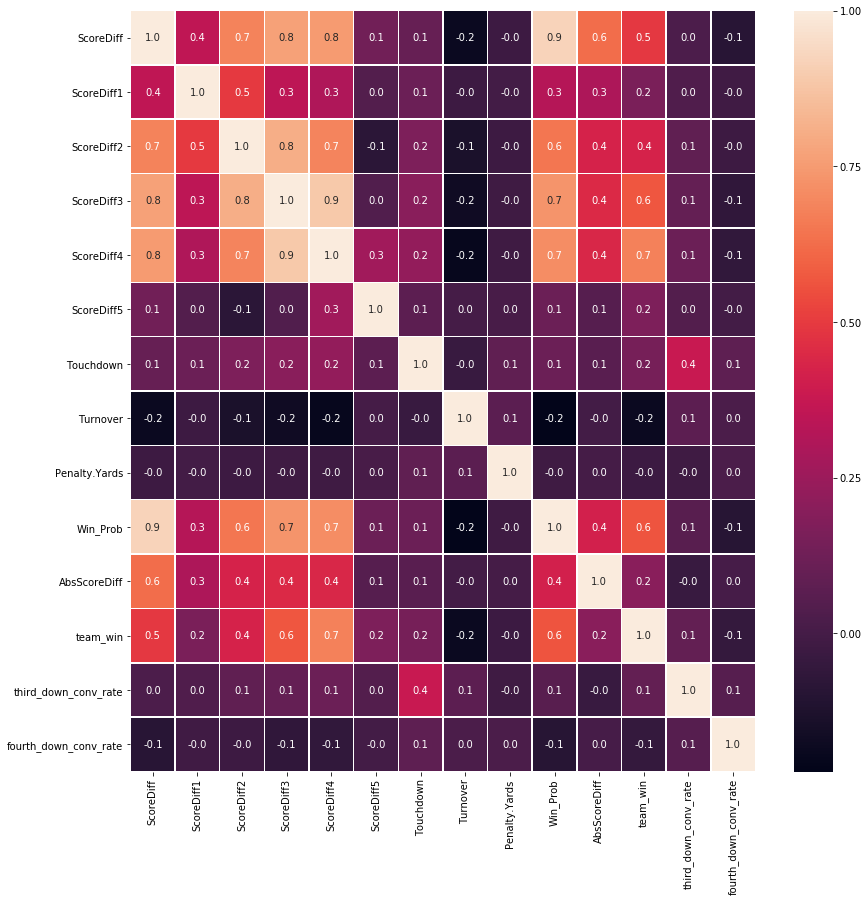

In [18]:
potentialFeatures = ['ScoreDiff','ScoreDiff1','ScoreDiff2','ScoreDiff3','ScoreDiff4','ScoreDiff5',
                     'Touchdown','Turnover','Penalty.Yards','Win_Prob','AbsScoreDiff','team_win','third_down_conv_rate','fourth_down_conv_rate']
nfl_corr = pbp_df[potentialFeatures].corr()
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(nfl_corr, annot=True, linewidths=.5, fmt= '.1f',ax=ax)
nfl_corr

#### Perason's R Correlation Coefficient

__Correlation coefficients__ ranges from -1 to 1. When the value is cloase to 1, it means that there is a strong positive correlation. For example, below we subset the correlation matrix that we created above and sorted the values. We can observe the team winning percentage tends to go up when there is a higher score difference in the fourth quarter. When the coefficient is close to -1, it means that there is a strong negative correlation: you can see a negative correlation between the team wins and turnovers

In [19]:
nfl_corr['team_win'].sort_values(ascending=False)

team_win                 1.000000
ScoreDiff4               0.677727
ScoreDiff3               0.567633
Win_Prob                 0.563266
ScoreDiff                0.491001
ScoreDiff2               0.422655
AbsScoreDiff             0.200339
ScoreDiff5               0.166669
ScoreDiff1               0.156078
Touchdown                0.150066
third_down_conv_rate     0.088454
Penalty.Yards           -0.029646
fourth_down_conv_rate   -0.053247
Turnover                -0.188593
Name: team_win, dtype: float64

In [20]:
cols = ['ScoreDiff','ScoreDiff1','ScoreDiff2','ScoreDiff3','ScoreDiff4','ScoreDiff5',
                     'Touchdown','Turnover','Win_Prob','AbsScoreDiff']

In [21]:
# create a list containing Pearson's correlation between 'team_win' with each column in cols
correlations = [pbp_df['team_win'].corr(pbp_df[f]) for f in cols]
len(cols), len(correlations)

(10, 10)

We make sure that the number of selected features and the correlations calculated are the same (e.g., 10 in this case).

Next couple of cells show some lines of code that use pandas plotting functions to create a 2D graph of these correlation values and column names

In [22]:
# create a function for plotting a dataframe with string columns and numeric values

def plot_dataframe(df, y_label):
    color='coral'
    fig = plt.gcf()
    fig.set_size_inches(20,12)
    plt.ylabel(y_label)
    
    ax = df.correlation.plot(linewidth=3.3, color=color)
    ax.set_xticks(df.index)
    ax.set_xticklabels(df.attributes, rotation=75); #Notice the ; (remove it and see what happens !)
    plt.show()

In [23]:
# create a dataframe suing cols and correlations

df5 = pd.DataFrame({'attributes': cols, 'correlation': correlations})

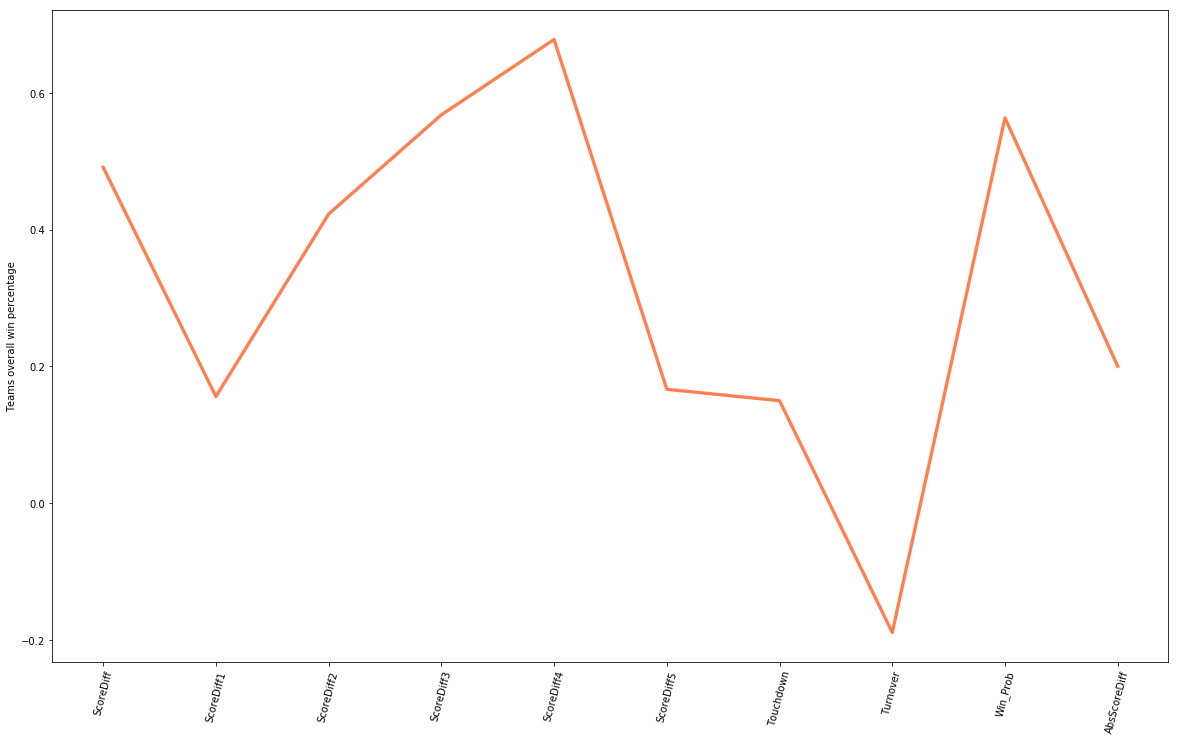

,attributes,correlation
0,ScoreDiff,0.491001
1,ScoreDiff1,0.156078
2,ScoreDiff2,0.422655
3,ScoreDiff3,0.567633
4,ScoreDiff4,0.677727
5,ScoreDiff5,0.166669
6,Touchdown,0.150066
7,Turnover,-0.188593
8,Win_Prob,0.563266
9,AbsScoreDiff,0.200339


In [24]:
# lets plot above dataframe using the function we created

plot_dataframe(df5, 'Teams overall win percentage')
df5

## Model Evaluation, Hyperparameter Tuning and Result Evaluation
create feature df and drio unnecessary fatures. 

In [34]:
# y includes our labels (wins and losses) and x includes our features
y = pbp_df.team_win_str
x_1 = pbp_df[potentialFeatures].drop('team_win', axis=1)

# change NAN to 0
where_are_NaNs = np.isnan(x_1)
x_1[where_are_NaNs] = 0

use the package sklearn and its associated preprocessing utilities to normalize the data.

In [35]:
from sklearn import preprocessing

x = x_1[['ScoreDiff','ScoreDiff1','ScoreDiff2','ScoreDiff3','ScoreDiff4','ScoreDiff5']].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
x_1 = pd.DataFrame(x_scaled)

Accuracy is:  0.9658160808858931


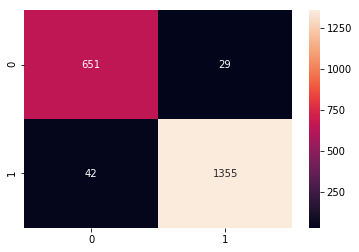

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x_1, y, test_size=0.3, random_state=42)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

Accuracy is 91.2% and it can be seen in the concusion matrix that we have made some wrong predictions. Now lets see other feature selection methods to find better results

### Univariate feature selection and random forest classificatio

In univariate feature selection, we will use [SelectKBest](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest) that removes all but the k highest scoring features. In this method we need to choose how many features we will use. For example, will k (number of features) be 5 or 10 or 15? The answer is only trying or intuitively. I do not try all combinations but I only choose k = 5 and find best 5 features.

In [37]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 5 features
select_feature = SelectKBest(chi2, k=5).fit(x_train, y_train)
print('Score list:', select_feature.scores_)
print('Feature list:', x_train.columns)

Score list: [2.48859542e+01 1.33408447e+01 3.33054965e+01 6.09932418e+01
 9.02841559e+01 2.26680371e-02]
Feature list: RangeIndex(start=0, stop=6, step=1)


Accuracy is:  0.9749638902262879


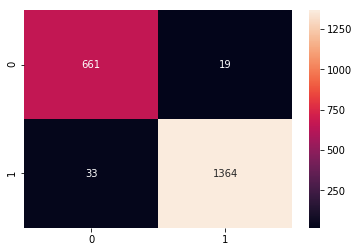

In [38]:
x_train_2 = select_feature.transform(x_train)
x_test_2 = select_feature.transform(x_test)
#random forest classifier with n_estimators=10 (default)
clf_rf_2 = RandomForestClassifier()      
clr_rf_2 = clf_rf_2.fit(x_train_2,y_train)
ac_2 = accuracy_score(y_test,clf_rf_2.predict(x_test_2))
print('Accuracy is: ',ac_2)
cm_2 = confusion_matrix(y_test,clf_rf_2.predict(x_test_2))
sns.heatmap(cm_2,annot=True,fmt="d")

### Support Vector Machine

In [39]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [40]:
print('Support vector machine accuracy: {:.3f}'.format(accuracy_score(y_test, svc.predict(x_test))))

Support vector machine accuracy: 0.864


looks like random forest had a higher accuracy

In [41]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = RandomForestClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, x_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.966


### Precision and recall

Percision and Recall scores for random forest 2

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test,clf_rf_2.predict(x_test_2)))

             precision    recall  f1-score   support

       Loss       0.95      0.97      0.96       680
        Win       0.99      0.98      0.98      1397

avg / total       0.98      0.97      0.98      2077



In [43]:
feature_labels = np.array(cols)
importance = clr_rf_2.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

ScoreDiff1-8.94%
ScoreDiff-9.04%
ScoreDiff2-9.15%
ScoreDiff3-29.50%
ScoreDiff4-43.37%


## Summary
This post is not intended to conclude that winning in the first quarter is not important, but there is a very strong correlation between winning quarter and winning games over the course of the season.